In [1]:
import re, os, glob, pandas as pd
import editdistance

In [2]:
## Import token totals
os.chdir("C://Users//Ruben//Documents//GitHub//TheForeign//SCC//output-data")
token_totals = pd.read_csv('tokens_year.csv')

## Import Master DF
os.chdir("C://Users//Ruben//Documents//Scriptie//Data//unigrams//output//years")
df = pd.read_csv('total-unigrams.csv')

## Define ED function
def GetCloseED(master_df, search_term):
    output_list = list()
    
    subset_df = master_df[master_df.ngram.str[0] == search_term[0]]
    
    for word in list(subset_df.ngram):
        ed = editdistance.eval(search_term, word)
        if ed < 3 and len(word) <= len(search_term):
            output_list.append(word)
    
    return output_list

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


_Extract Unigrams_

In [3]:
## Get 'Buitenland'
df_buit = df[df["ngram"].str.lower().str.contains("werelddeel")]

#df_buit = df[df.ngram.isin(['buitenland'])]
df_buit = df_buit.reset_index(drop=True)
df_buit = df_buit.dropna()
df_buit['year'] = df_buit['year'].astype(int)
df_buit = df_buit.pivot(index='ngram', columns='year', values='count')
df_buit = df_buit.fillna(0)
df_buit.columns = df_buit.columns.astype(str)
list_sums = list()

for i in list(df_buit.columns):
    tmp = sum(df_buit[i].astype(int))
    list_sums.append(tmp)

token_totals['buitenland'] = list_sums
token_totals['buitenland'] = token_totals['buitenland'] / token_totals['tokens'] * 100
plot = token_totals.plot.line(x='year', y='buitenland')

In [16]:
df_buit[df_buit.index == 'buitenlandig']

year,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,...,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914
ngram,,,,,,,,,,,,,,,,,,,,,


In [5]:
os.chdir("C://Users//Ruben//Documents//GitHub//TheForeign//SCC//output-data")

df_buit.to_csv('unigrams_werelddeel.csv')

In [86]:
df_buit.to_csv("unigrams_buitenland.csv")

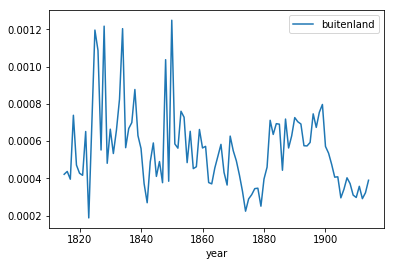

In [4]:
token_totals.plot.line(x='year', y='buitenland')

In [11]:
df = df_buit[(df_buit.index == "werelddeelen")]

In [12]:
df = df.append(df_buit[(df_buit.index == "werelddeel")])

In [13]:
df

year,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,...,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914
ngram,,,,,,,,,,,,,,,,,,,,,
werelddeelen,8,9,3,2,9,11,8,13,0,12,...,157,198,189,197,174,227,219,226,237,218
werelddeel,12,12,13,24,11,2,9,10,9,17,...,109,115,175,187,145,177,268,194,207,289


In [16]:
df = df.sum(axis=0)

In [20]:
df = pd.DataFrame(df)
df.columns = ['year', 'count']

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [25]:
df.iloc[:,1]

IndexError: single positional indexer is out-of-bounds

In [26]:
os.chdir("C://Users//Ruben//Documents//GitHub//TheForeign//SCC//output-data")
df.to_csv("unigrams_werelddeel.csv")